# INFO 213: Data Science Programming 2
___

### Week 5: Naive Bayes and Probability
___

### 9:30-10:50am, Mon., July 23, and July 25, 2018
---

**Question:**
-  How to apply the Naive Bayes module in Scikit Learn package?

**Objectives:**
- Import sklearn.naive_bayes
- Create models using the methods in the module
- Fit the models and predict results

## Bayesian Classification-Recap

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## More about Naive Bayes Spam Filter

Imagine now that we have a vocabulary of many words $w_{1}, ...,w_{n}$. To move this into
the realm of probability theory, we’ll write $X_{i}$ for the event “a message contains the
word $w_{i}$.” Also imagine that (through some unspecified-at-this-point process) we’ve
come up with an estimate $P(X_{i}|S)$ for the probability that a spam message contains
the ith word, and a similar estimate $P(X_{i}|\neg S)$ for the probability that a nonspam
message contains the ith word.

Naive Bayes method:

$P(X_{1} = x_{1}, . . . , X_{n} = x_{n}|S) = P(X_{1} = x_{1}|S) \times ⋯ \times P(X_{n} = x_{n}|S)$

The Naive Bayes assumption allows us to compute each of the probabilities on the
right simply by multiplying together the individual probability estimates for each
vocabulary word.

In practice, you usually want to avoid multiplying lots of probabilities together, to
avoid a problem called underflow, in which computers don’t deal well with floating point
numbers that are too close to zero. Recalling from algebra that
$\log (ab) = \log (a) + \log (b)$ and that $\exp \log (x) = x$, we usually compute $p_{1} \times ...\times p_{n}$ as
the equivalent (but floating-point-friendlier):

$\exp (\log (p_{1}) + ⋯ + \log (p_{n}))$

If we have a fair number of “training” messages labeled as spam and not-spam, an obvious
first try is to estimate $P(X_{i}|S)$ simply as the fraction of spam messages containing
word $w_{i}$.

To avoid zero-probability problem, we usually use some kind of smoothing.
In particular, we’ll choose a pseudocount—k—and estimate the probability of seeing
the ith word in a spam as:

$P(X_{i}|S) = (k + number\ of\ spams\ containing\ w_{i}) / (2k + number\ of\ spams)$

Similarly for $P(X_{i}|\neg S)$.



## Gaussian Naive Bayes

In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

```
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');```

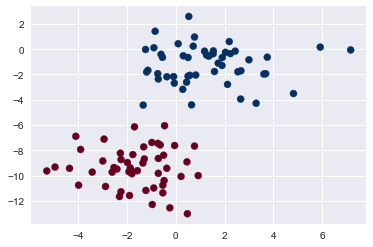

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

![](gaussian-NB.png)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

```
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);```

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

```
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)```

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

```
rng.rand(2000, 2)```

In [8]:
rng.rand(2000, 2)

array([[ 0.29264205,  0.56651827],
       [ 0.13741443,  0.34971218],
       [ 0.05321638,  0.37906814],
       ..., 
       [ 0.68995821,  0.92318343],
       [ 0.94130089,  0.80182819],
       [ 0.5391446 ,  0.83721853]])

```
len(Xnew)```

In [9]:
len(Xnew)

2000

```
Xnew[:5]```

In [10]:
Xnew[:5]

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       [ 0.12622096,  2.05191401],
       [ 7.49127865, -7.09805266]])

Now we can plot this new data to get an idea of where the decision boundary is:

```
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha = 0.1)
lim = plt.axis()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='PiYG')
plt.axis(lim);```

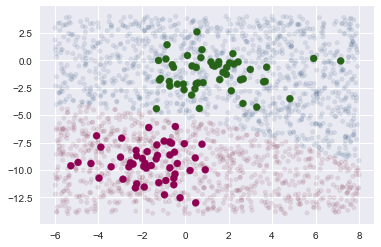

In [11]:
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha = 0.1)
lim = plt.axis()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='PiYG')
plt.axis(lim);



A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

```
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)```

In [12]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

```
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names```

In [9]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

```
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)```

In [10]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

```
train.keys()```

In [11]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

Here is a representative entry from the data:

```
print(train.data[5])```

In [12]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



```
train.target[5]```

In [13]:
train.target[5]

3

```
pd.unique(train.target)```

In [14]:
pd.unique(train.target)

array([2, 1, 0, 3])

```
test.data[2]```

In [15]:
test.data[2]

'From: isaackuo@jell-o.berkeley.edu (Isaac Kuo)\nSubject: Re: Drag-free satellites\nOrganization: U.C. Berkeley Math. Department.\nLines: 37\nNNTP-Posting-Host: jell-o.berkeley.edu\n\nIn article <15821.2be3e125@cpva.saic.com> thomsonal@cpva.saic.com writes:\n>On Sat, 1 May 1993 23:13:39 GMT, henry@zoo.toronto.edu (Henry Spencer) said:\n>\n>> No.  A "dragless" satellite does not magically have no drag; it burns fuel\n>> constantly to fight drag, maintaining the exact orbit it would have *if*\n>> there was no drag.  \n>\n>     Well, almost. It turns out that clever orbital mechanics can \n>engineer things so that resonant interactions with the higher order \n>harmonics of the Earth\'s gravitational field can pump energy into a \n>satellite, and keep it from experiencing drag effects for periods of \n>months to years. \n\nA harmonic of the Earth\'s gravitational field?  What IS a harmonic of the\nEarth\'s gravitational field?\n\n>     My favorite example of this is the Soviet/Russian heav

test.target[2]

In [17]:
test.target[2]

1

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

```
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline```

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

```
model_vectorizer = TfidfVectorizer()
model_classifier = MultinomialNB()```

In [19]:
model_vectorizer = TfidfVectorizer()
model_classifier = MultinomialNB()

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

```
model_vectorizer.fit(train.data)
vectors = model_vectorizer.transform(train.data)```

In [20]:
model_vectorizer.fit(train.data)
vectors = model_vectorizer.transform(train.data)

```
model_classifier.fit(vectors, train.target)```

In [21]:
model_classifier.fit(vectors, train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

```
test_vectors = model_vectorizer.transform(test.data)
labels = model_classifier.predict(test_vectors)```

In [22]:
test_vectors = model_vectorizer.transform(test.data)
labels = model_classifier.predict(test_vectors)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

```
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');```

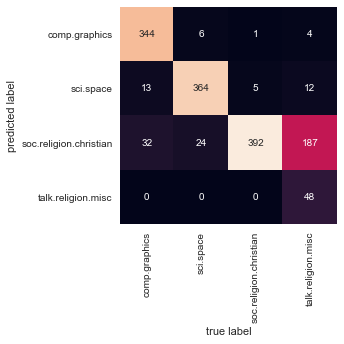

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

```
def predict_category(s, train=train, model_vectorizer=model_vectorizer, \
                     model_classifier=model_classifier):
    vector = model_vectorizer.transform([s])
    pred = model_classifier.predict(vector)
    return train.target_names[pred[0]]```

In [24]:
def predict_category(s, train=train, model_vectorizer=model_vectorizer, \
                     model_classifier=model_classifier):
    vector = model_vectorizer.transform([s])
    pred = model_classifier.predict(vector)
    return train.target_names[pred[0]]

Let's try it out:

```
predict_category('sending a payload to the ISS')```
``

In [25]:
predict_category('sending a payload to the ISS')



'sci.space'

```
predict_category('discussing islam vs atheism')```

In [26]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

```
predict_category('determining the screen resolution')```

In [27]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.